In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(t,y):
    return (t*(np.e**(3*t)))-(2*y)   # TP1 b)
    #return 1 + ((t-y)**2)           # TP1 a)
    #return (2-(2*t*y))/((t**2)+1)   # Ejemplo Euler

def yReal(t):
    return (1/5)*t*(np.e**(3*t))-(1/25)*(np.e**(3*t))+((1/25)*(np.e**(-2*t)))    # TP1 b)
    #return t + (1/(1-t))                                                        # TP1 a)
    #return ((2*t)+1)/((t**2)+1)                                                 # Ejemplo Euler

In [3]:
"""
faprox = Funcion a Aproximar
freal = Funcion Real
h = Tamaño del paso
I = Par [a,b] para calcular los pasos
y0 = Valor iniciar conocido
"""

def RungeKutta4(faprox,freal,h,I,y0):
    # Calculos los pasos con los que aproximar
    pasos = [I[0]+(i*h) for i in range(1,int((I[1]-I[0])//h)+1)]    
    # Creo un DataFrame para hacer la tabla y poder graficar luego
    columnas=["t","yAprox","yReal","eLocal","eGlobal"]
    df = pd.DataFrame(np.array([[pasos[0]-h,y0,y0,0.0,0.0]]),columns=columnas)
    print(df)    
    
    # Usando la "fila anterior" calculo el siguiente resutlado
    for i in range(len(pasos)):        
        t = pasos[i]
        t0 = t-h
        y = float(df["yAprox"].loc[i])
        k1 = f(t0,y)
        k2 = f(t0+(h/2),y+(h*k1/2))
        k3 = f(t0+(h/2),y+(h*k2/2))
        k4 = f(t0+h,y+(h*k3))
        yaprox = y+((h/6)*(k1+k2+k3+k4))    #Método de Euler
        yreal = freal(t)
        df = df.append(pd.DataFrame(np.array([[t,yaprox,yreal,abs(yaprox-y),abs(yaprox-yreal)]]),columns=columnas),ignore_index=True)
    
    # Hago un print de la tabla
    print(df)
    
    # Grafico
    graficar(df)    
    
def graficar(df):
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(2,1,1)
    ax1.plot(df["t"],df["yAprox"])
    ax1.plot(df["t"],df["yReal"])
    ax1.legend(labels=["Aproximado","Real"]) #loc="upper left" - Para ubicar el Legend

    ax1 = fig.add_subplot(2,1,2)
    ax1.plot(df['t'],df["eLocal"])
    ax1.plot(df['t'],df['eGlobal'])
    ax1.legend(labels=["Error Local","Error Global"])

    plt.show()

     t  yAprox  yReal  eLocal  eGlobal
0  0.0     0.0    0.0     0.0      0.0
      t    yAprox     yReal    eLocal   eGlobal
0  0.00  0.000000  0.000000  0.000000  0.000000
1  0.25  0.032472  0.045431  0.032472  0.012959
2  0.50  0.200704  0.283617  0.168232  0.082912
3  0.75  0.750844  1.052576  0.550139  0.301732
4  1.00  2.313914  3.219099  1.563070  0.905185


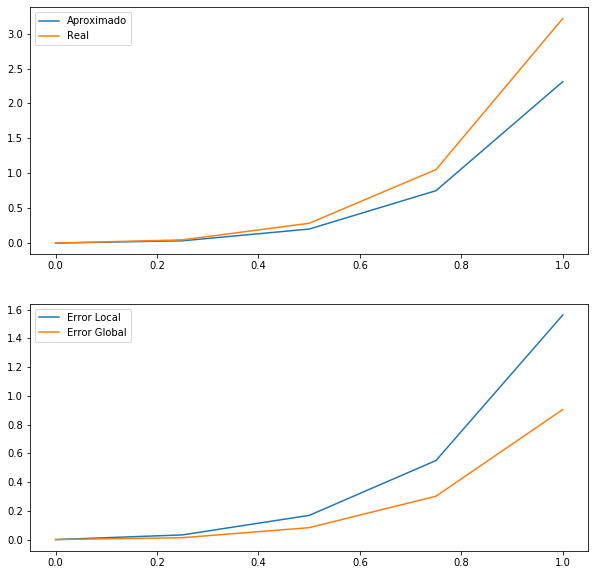

In [4]:
    # Definir intervalo I, tamaño de paso h y valor iniciar y0
    I = [0,1]
    h = 0.25
    y0 = 0.0
    RungeKutta4(f,yReal,h,I,y0)